# Cutting signals and preprocessing

In [1]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

import signal_processing as sp

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
PATH = "../data/raw/airspyhf+"

In [11]:
files = [file for file in os.listdir(PATH) if file.endswith(".nfc")]
files.sort()
files

['tag1-2M-1.nfc',
 'tag1-2M-17.1k-0-16-16.nfc',
 'tag1-2M-17.1k.nfc',
 'tag1-2M-2.nfc',
 'tag2-2M-1.nfc',
 'tag3-2M-1.nfc']

In [7]:
tag3 = sp.read_signal(os.path.join(PATH, files[4]))

In [8]:
tag3_mag = np.abs(tag3[1])

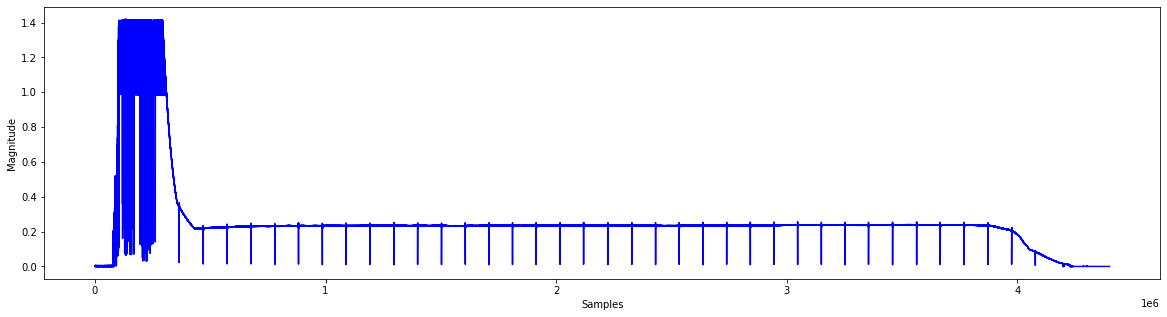

In [9]:
plt.plot(tag3_mag[int(2.7e6):int(7.1e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [10]:
tag3_cut = tag3_mag[int(2.7e6):int(7.1e6)]

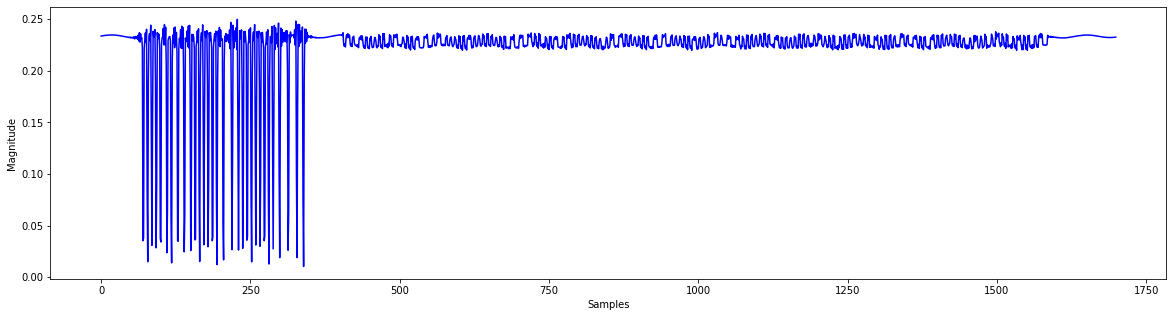

In [39]:
plt.plot(tag3_mag[int(3.789e6):int(3.7907e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

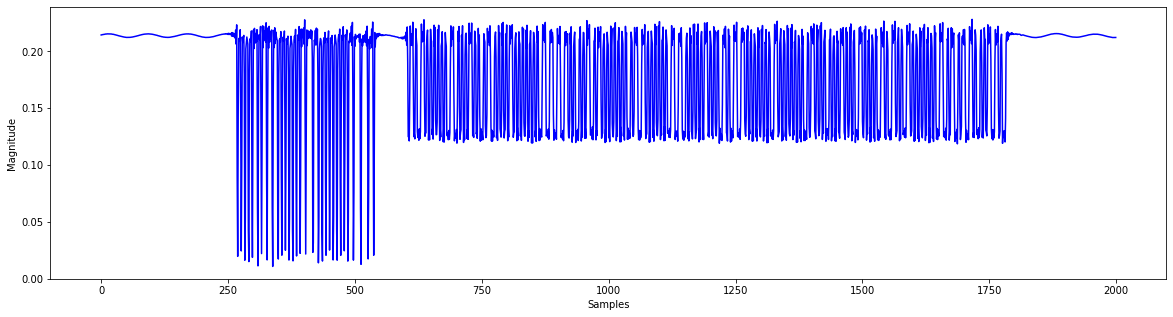

In [30]:
tag2 = sp.read_signal(os.path.join(PATH, files[1]))
tag2_mag = np.abs(tag2[1])

plt.plot(tag2_mag[int(6.445e6):int(6.447e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [34]:
tag3_single = tag3_mag[int(3.789e6):int(3.7907e6)]

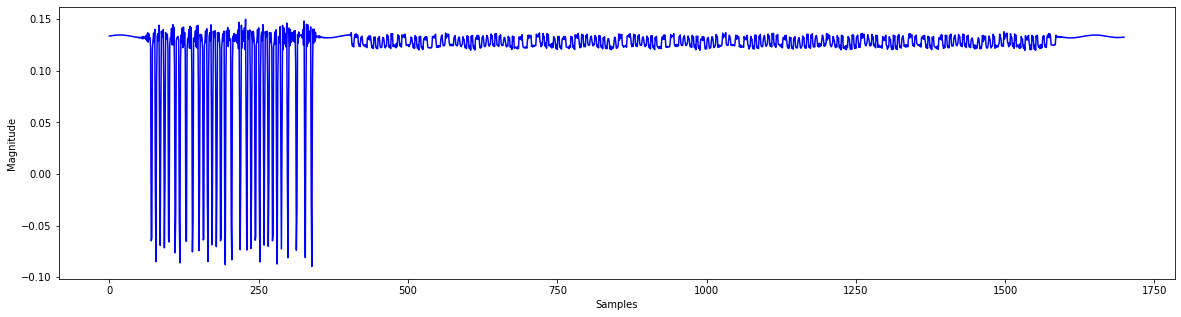

In [59]:
plt.plot(sp.shift_down(tag3_single, 0.1), 'b-')
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

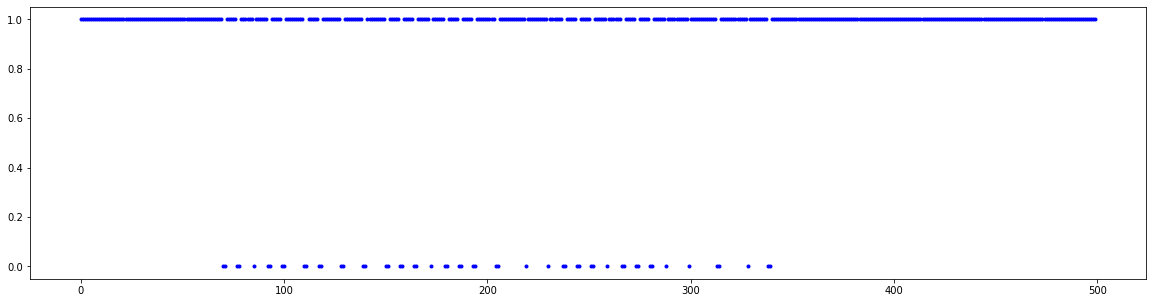

In [36]:
tag3_single_shifted = sp.shift_down(tag3_single, 0.1)
plt.plot(sp.binary_slicer(tag3_single_shifted[0:500]), 'b.')
plt.show()

In [56]:
tag3_single_miller = sp.binary_slicer(tag3_single_shifted[0:500])

In [55]:
''.join(tag3_single_miller.astype(str))

'11111111111111111111111111111111111111111111111111111111111111111111110011111001111110111111001111100111111111001111100111111111001111111110011111111100111110011111001111110111111001111100111110011111111100111111111111101111111111011111100111110011111001111110111111001111100111110011111101111111111011111111111110011111111111110111111111001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111'

In [57]:
sp.write_signal_to_file(tag3_single_miller, "tag3_single_miller.bin")